In [0]:
from sklearn.cluster import KMeans
from sklearn import datasets
import pandas as pd
from sklearn import metrics
import seaborn as sns



In [0]:
import matplotlib.pyplot as plt

wines = datasets.load_wine()

X_wines = wines.data #input

Y_wines = wines.target # output


In [0]:
x = pd.DataFrame(wines.data , columns= ['Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of Ash', 'Magnesium', 
                                      'Total Phenols', 'Flavanoids', 'Nonflavanoid Phenols', 'Proanthocyanins', 
                                      'Colour Intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline'])
print(x)
y = pd.DataFrame(wines.target ,  columns = ['Target'])
y

In [0]:
#plt.scatter(x[1] , x[8] , c = 'blue')
#plt.xlabel('Petal Length' , fontsize = 10)
#plt.ylabel('Petal Width' , fontsize = 10)

0.0
0.3694075388574537
0.37111371823084754
0.30344253157834694
0.31158801033176253
0.29090227688418224
0.22632105878612552
0.19781277843153539
0.18197901068434116
0.1510387401532802


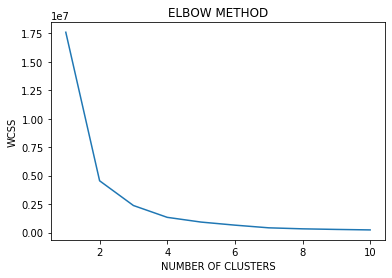

In [50]:
wcss = []
for i in range(1,11):
  model = KMeans(n_clusters= i , max_iter= 1000) # modelo , el valor de los centroides (n_clusters) lo escogemos nosotros
  model.fit(x)                                    # segun cual es el el mas cercano a una prediccion del 100%
  y_labels = model.labels_

  y_Kmeans = model.predict(x)

  wcss.append(model.inertia_)
  #print('predict' , y_Kmeans)


  accuracy = metrics.adjusted_rand_score(Y_wines , y_Kmeans )

  print(accuracy)  # con todo esto vemos que tan bien clasifico


plt.plot(range(1, 11), wcss)
plt.title('ELBOW METHOD')
plt.xlabel('NUMBER OF CLUSTERS')
plt.ylabel('WCSS')
plt.show()

predicciones  [1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 2 2 1 1 2 1 1 1 1 1 1 2 2
 1 1 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 0 0 2 0 0 2 2 2 0 0 1
 2 0 0 0 2 0 0 2 2 0 0 0 0 0 2 2 0 0 0 0 0 2 2 0 2 0 2 0 0 0 2 0 0 0 0 2 0
 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 2 2 2 2 0 0 0 2 2 0 0 2 2 0 2
 2 0 0 0 0 2 2 2 0 2 2 2 0 2 0 2 2 0 2 2 2 2 0 0 2 2 2 2 2 0]
0.37111371823084754


/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


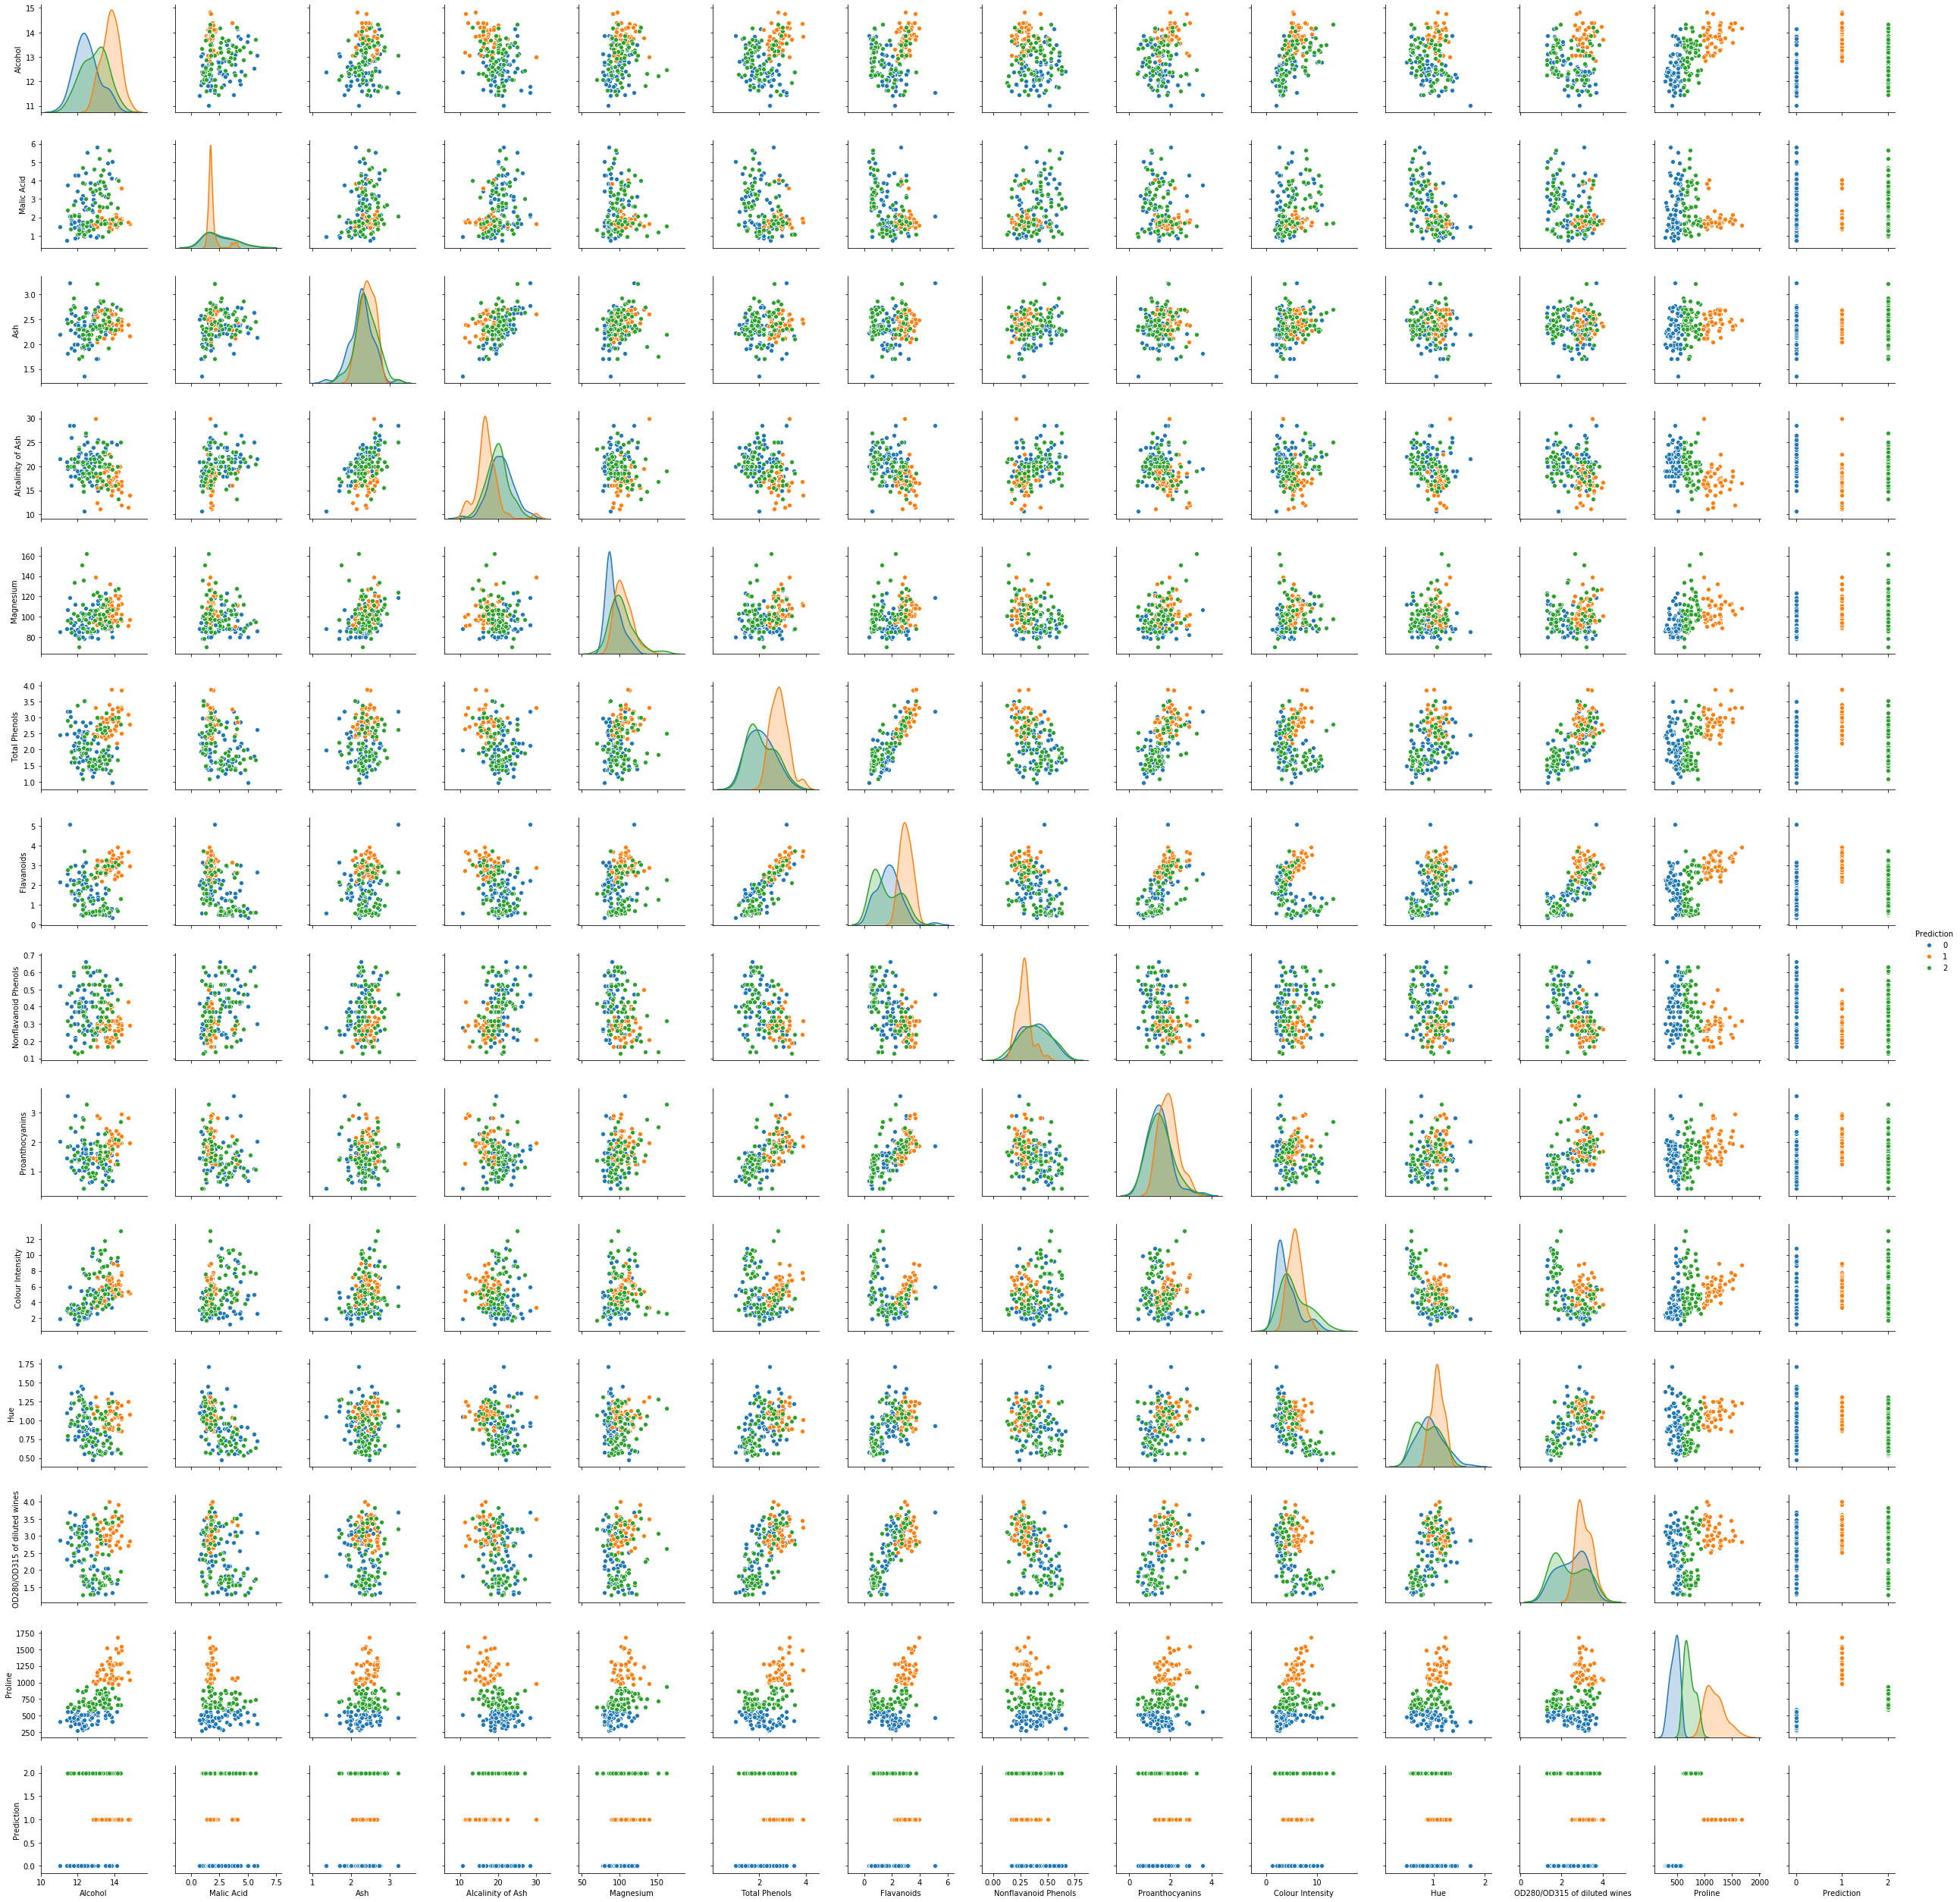

In [56]:
modelw = KMeans(n_clusters = 3, max_iter = 1000)
modelw.fit(x)
yw_labels = modelw.labels_
yw_kmeans = modelw.predict(x)
print('predicciones ', yw_kmeans)
yw_kmeans_df = pd.DataFrame(yw_kmeans, columns = ['Prediction'])

# Precisión del modelo
accuracyw =  metrics.adjusted_rand_score(Y_wines, yw_kmeans)
print(accuracyw)

# Concateno el dataset de entrada con el de la prediccion
Z = pd.concat([x, yw_kmeans_df],axis=1)

# Grafico para ver relación de las features con respecto a las 
# valores de la predicción, poniendo color según (0,1,2) 
# considerando las tres clases.
sns.pairplot(Z, hue = 'Prediction')